# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
# pd = pandas, read_csv = function that can read csv file that we have in the folder
dataset = pd.read_csv("Position_Salaries.csv")

# creating matrix fitures/predictor (independent variables) and dependent variables
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4) # degree means the "n" in polynomial linear regression
                                        # we first try 2, and then 3 and 4 (trial)

x_poly = poly_reg.fit_transform(x) # transform method to procides to transformation 
                          # from matrix single feature (x) to matrix where x1 is the first feature and x1^2 as second feature
                          # (transform x to polynomial x)
                  
lin_reg_2 = LinearRegression()  # we make second linear reg to combine it with the x_poly
lin_reg_2.fit(x_poly, y)        # we cannot use lin_reg because it already trained, so it has its own coefiecient



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

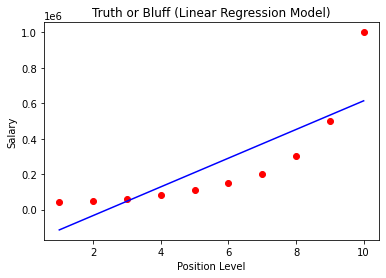

In [ ]:
plt.scatter(x,y, color = "red")
plt.plot(x,lin_reg.predict(x), color = "blue")

plt.title("Truth or Bluff (Linear Regression Model)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

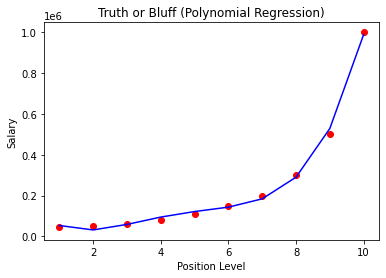

In [ ]:
plt.scatter(x,y, color = "red")
plt.plot(x,lin_reg_2.predict(x_poly), color = "blue") # or
# plt.plot(x,poly_reg.fit_transform(x), color = "blue"). they both the same but prefer this "poly_reg.fit_transform(x)" one

plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

The graphic above is not smooth, it has "edge". so we will make it smoother with higher resolution 

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

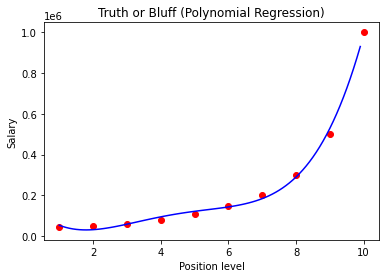

In [ ]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Comparison Between Linear Regression and Polynomial Regression

### Predicting a new result with Linear Regression

In [ ]:
print(lin_reg.predict([[6.5]]))

[330378.78787879]


### Predicting a new result with Polynomial Regression

In [ ]:
print(lin_reg_2.predict(poly_reg.fit_transform([[6.5]])))


[158862.45265155]
